# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.





Dataset ini merupakan dataset multivariat yang digunakan untuk analisis dan prediksi penyakit jantung. Dataset berisi informasi klinis pasien dengan 14 atribut utama yang umum digunakan dalam penelitian Machine Learning, meskipun secara keseluruhan tersedia hingga 76 atribut. Tujuan utama penggunaan dataset ini adalah untuk memprediksi keberadaan penyakit jantung pada pasien berdasarkan karakteristik medis yang dimiliki, serta untuk menggali pola dan insight yang relevan dalam bidang kesehatan.

Dataset dapat diakses melalui: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [82]:
df = pd.read_csv("/content/heart_disease_uci.csv")

In [83]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [85]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [88]:
df.shape

(920, 16)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 1. Menangani missing value sesuai dengan jumlah dan tipenya

In [89]:
df = df.drop(columns=["id", "dataset", "ca", "thal"])

In [90]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [91]:
categorical_cols = [
    "sex", "cp", "fbs", "restecg",
    "exang", "slope"
]
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

/tmp/ipython-input-4096768053.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)


In [92]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [93]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0
1,67.0,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2.0
2,67.0,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1.0
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0
4,41.0,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0
5,56.0,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0
6,62.0,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,3.0
7,57.0,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0
8,63.0,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,2.0
9,53.0,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,1.0


## 2. Split Train-Test dan Cek Sebaran Target

In [94]:
df["num"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

In [95]:
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=df["num"]
)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (736, 12)
Test shape: (184, 12)


In [96]:
train_df["num"].value_counts()

,count
num,
1,407
0,329


Distribusi variabel target menunjukkan terdapat sedikit ketidakseimbangan antara kelas positif (407 data) dan negatif (329 data). Namun, perbedaan ini masih tergolong ringan sehingga tidak diperlukan teknik penanganan imbalance khusus.

In [97]:
X = df.drop(columns=["num"])
y = df["num"]

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [99]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (736, 11)
X_test : (184, 11)
y_train: (736,)
y_test : (184,)


## 3. Scalling dan Encoding Fitur

In [100]:
numerical_cols = [
    "age", "trestbps", "chol", "oldpeak"
]

categorical_cols = [
    "sex", "cp", "fbs", "restecg", "exang",
    "slope"
]

In [101]:
scalers = {}

for col in numerical_cols:
    scaler = MinMaxScaler()
    scaler.fit(X_train[[col]])

    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

    scalers[col] = scaler

In [102]:
encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    encoder.fit(X_train[col])

    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

    encoders[col] = encoder

In [103]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
640,0.510204,1,2,0.666667,0.000000,0,0,122.000000,1,0.295455,1
743,0.938776,1,2,0.476057,0.000000,0,1,118.574890,0,0.346783,1
890,0.510204,1,0,0.366667,0.402985,0,1,122.000000,1,0.522727,1
270,0.673469,1,0,0.500000,0.343284,0,0,138.000000,1,0.511364,2
654,0.571429,1,2,0.625000,0.000000,0,2,99.000000,0,0.295455,1
...,...,...,...,...,...,...,...,...,...,...,...
833,0.897959,1,0,0.512194,0.349917,0,1,123.307185,0,0.430226,1
242,0.428571,0,0,0.416667,0.446103,0,1,163.000000,0,0.295455,2
709,0.775510,1,0,0.583333,0.000000,0,1,108.000000,1,0.522727,1
21,0.612245,0,3,0.583333,0.469320,1,0,162.000000,0,0.409091,2


## 4. PCA

In [106]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_train[numerical_cols])

X_train_pca = pca.transform(X_train[numerical_cols])
X_test_pca = pca.transform(X_test[numerical_cols])

print("Jumlah komponen PCA:", pca.n_components_)

Jumlah komponen PCA: 4


In [107]:
pca_cols = [f"pca_{i+1}" for i in range(pca.n_components_)]

X_train_pca = pd.DataFrame(
    X_train_pca,
    columns=pca_cols,
    index=X_train.index
)

X_test_pca = pd.DataFrame(
    X_test_pca,
    columns=pca_cols,
    index=X_test.index
)

X_train_final = pd.concat(
    [X_train.drop(columns=numerical_cols), X_train_pca],
    axis=1
)

X_test_final = pd.concat(
    [X_test.drop(columns=numerical_cols), X_test_pca],
    axis=1
)

In [110]:
pca_numerical_columns_2 = [
    "age",
    "trestbps",
    "chol",
    "oldpeak"
]

In [108]:
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

var_exp, cum_var_exp

(array([0.395, 0.312, 0.173, 0.119]), array([0.395, 0.707, 0.88 , 0.999]))

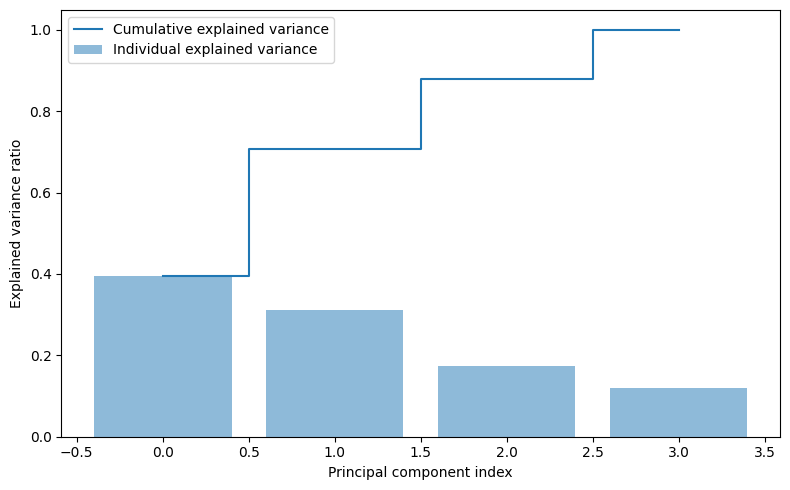

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(
    range(len(pca_numerical_columns_2)),
    var_exp,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(len(pca_numerical_columns_2)),
    cum_var_exp,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [113]:
train_clean = pd.concat([X_train_final, y_train], axis=1)
test_clean = pd.concat([X_test_final, y_test], axis=1)

train_clean.to_csv("train_preprocessing.csv", index=False)
test_clean.to_csv("test_preprocessing.csv", index=False)